# Magnetic Levitation Useful Functions + Calculations
- Jeff

Small notebook to calculate the B field necessary to increase the trap depth during optical transport by a certain temperature using magnetic levitation. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

import arc

from get_polarizability import *

In [2]:
# constants
h = 6.62607015e-34  # Planck's constant in J*s
hbar = h / (2 * np.pi)  # reduced Planck's constant
c = 299792458  # speed of light in m/s
epsilon_0 = 8.854187817e-12  # vacuum permittivity in F/m
a0 = 5.29177210903e-11  # Bohr radius in meters
e = 1.602176634e-19  # elementary charge in Coulombs
me = 9.10938356e-31  # electron mass in kg
kB = 1.380649e-23  # Boltzmann constant in J/K
mu0 = 1.25663706127e-6 # Permeability of free space in SI units
muB = 9.2740100657e-24 # Bohr magneton in J/T

# Cs information
Cs_D1_wavelength = 894.592959e-9  # Cs D1 line wavelength in meters
Cs_D1_frequency = c / Cs_D1_wavelength  # Cs D1 line frequency in Hz
Cs_D1_gamma = 4.5612e6 # Cs D1 line natural linewidth in Hz
Cs_D1_pi_Isat = 2.4981*10  # Cs D1 line pi-polarized saturation intensity in W/m^2

Cs_D2_wavelength = 852.34727582e-9  # Cs D2 line wavelength in meters
Cs_D2_frequency = c / Cs_D2_wavelength  # Cs D2 line frequency in Hz
Cs_D2_gamma = 5.2227e6 # Cs D2 line natural linewidth in Hz
Cs_D2_pi_Isat = 1.6536*10  # Cs D2 line pi-polarized saturation intensity in W/m^2
Cs_D2_iso_Isat = 2.7059*10  # Cs D2 line isotropic saturation intensity in W/m^2
Cs_D2_sigma_Isat = 1.1023*10  # Cs D2 line sigma-polarized saturation intensity in W/m^2

# Rb information
Rb_D1_wavelength = 794.978850e-9      # Rb D1 line wavelength in meters
Rb_D1_frequency = c / Rb_D1_wavelength  # Rb D1 line frequency in Hz
Rb_D1_gamma = 5.746e6 # Rb D1 line natural linewidth in Hz
Rb_D1_pi_Isat = 4.484*10  # Rb D1 line pi-polarized saturation intensity in W/m^2

Rb_D2_wavelength = 780.241209686e-9  # Rb D2 line wavelength in meters
Rb_D2_frequency = c / Rb_D2_wavelength  # Rb D2 line frequency in Hz
Rb_D2_gamma = 6.065e6 # Rb D2 line natural linewidth in Hz
Rb_D2_pi_Isat = 2.503*10  # Rb D2 line pi-polarized saturation intensity in W/m^2
Rb_D2_iso_Isat = 3.576*10  # Rb D2 line isotropic saturation intensity in W/m^2
Rb_D2_sigma_Isat = 1.669*10  # Rb D2 line sigma-polarized saturation intensity in W/m^2

## Naive Calculation

In [3]:
def lande_gF(F, J, I, gJ, gI, muN_over_muB=1/1836.15267389):
    """
    Calculate the hyperfine Landé g_F factor for an atom in the weak-field (linear Zeeman) regime.
    
    Parameters
    ----------
    F : float
        Total hyperfine quantum number (can be integer or half-integer).
    J : float
        Total electronic angular momentum quantum number.
    I : float
        Nuclear spin quantum number.
    gJ : float
        Electronic Landé g-factor (dimensionless).
    gI : float, optional
        Nuclear g-factor (dimensionless). Default 0 (neglect nuclear contribution).
    muN_over_muB : float, optional
        Ratio mu_N / mu_B (nuclear magneton over Bohr magneton). Default ~ 1/1836.15267389.
    
    Returns
    -------
    gF : float
        The Landé g-factor for the hyperfine level F.
    
    Formula
    -------
    g_F = g_J * [F(F+1) + J(J+1) - I(I+1)] / [2 F(F+1)]
          + g_I * (mu_N/mu_B) * [F(F+1) + I(I+1) - J(J+1)] / [2 F(F+1)]
    """
    num1 = F*(F+1) + J*(J+1) - I*(I+1)
    num2 = F*(F+1) + I*(I+1) - J*(J+1)
    den = 2*F*(F+1)
    gF = gJ * (num1/den) + gI * muN_over_muB * (num2/den)
    return gF

def lande_gJ(L, S, J, gL=1.0, gS=2.0023193043737):
    return (gL * (J*(J+1) - S*(S+1) + L*(L+1)) / (2*J*(J+1))
          + gS * (J*(J+1) + S*(S+1) - L*(L+1)) / (2*J*(J+1)))


In [4]:
# Cesium 133 in F=3, mF=-1 sublevel, worst case scenario for maglev
m = 133 * 1.66054e-27
g = 9.8

##### Axial (along x) displacement, (z=0) #####
# MOT coil parameters, copying 2.0's numbers
N = 18 # 18 turns per coil
R = 68.326e-3/2 # Inner radius
s = 26e-3 # 53 mm between coils along coil axis

# Atom choice
atom = arc.Caesium()   # pick an atom
n = 6
L = 0
J = 1/2
S = 1/2  # For alkali atoms
I  = atom.I # nuclear spin
F = 3 # Choose F=3 manifold
mF = 3

# Calculated constants
gI = atom.gI             # nuclear g-factor (dimensionless, for use with μ_N)
gJ = lande_gJ(L, S, J, gL=atom.gL, gS=atom.gS)
gF = lande_gF(F, J, I, gJ, gI)

# Necessary field gradient
dBdz = (m*g)/(gF*mF*muB)
print(f"Necessary field gradient = {dBdz*1e2} Gauss/cm")

I = (2*dBdz*(R**2 + s**2)**(5/2)) / (3*mu0*N*(R**2)*s)
print(f"Necessary current: {I} A")

Necessary field gradient = -31.080963200151917 Gauss/cm
Necessary current: -44.026480073769946 A


In [5]:
# Rb87 in F=1, mF=1
m = 87 * 1.66054e-27
g = 9.8

##### Axial (along x) displacement, (z=0) #####
# MOT coil parameters, copying 2.0's numbers
N = 18 # 18 turns per coil
R = 68.326e-3/2 # Inner radius
s = 26e-3 # 53 mm between coils along coil axis

# Atom choice
atom = arc.Rubidium87()   # pick an atom
n = 5
L = 0
J = 1/2
S = 1/2  # For alkali atoms
I  = atom.I # nuclear spin
F = 1
mF = 1

# Calculated constants
gI = atom.gI             # nuclear g-factor (dimensionless, for use with μ_N)
gJ = lande_gJ(L, S, J, gL=atom.gL, gS=atom.gS)
gF = lande_gF(F, J, I, gJ, gI)

# Necessary field gradient
dBdz = (m*g)/(gF*mF*muB)
print(f"Necessary field gradient = {dBdz*1e2} Gauss/cm")

I = (2*dBdz*(R**2 + s**2)**(5/2)) / (3*mu0*N*(R**2)*s)
print(f"Necessary current: {I} A")

Necessary field gradient = -30.496723071674726 Gauss/cm
Necessary current: -43.19889837338776 A


# Full Field Simulations

In [6]:
def loop_field_cylindrical(rho, z, R, N, I, z0=0.0, mu0=mu0):
    """
    Magnetic field of a single circular loop in cylindrical coords (rho,z),
    using complete elliptic integrals (SciPy).

    Returns Brho, Bz in Tesla.

    Notes
    -----
    Uses the standard closed-form expressions involving K(m) and E(m),
    where m = k^2 = 4 R rho / ((R+rho)^2 + (z-z0)^2).
    """
    rho = np.asarray(rho, dtype=float)
    z = np.asarray(z, dtype=float)
    dz = z - z0

    # Broadcast to common shape
    rho, dz = np.broadcast_arrays(rho, dz)

    Brho = np.zeros_like(rho, dtype=float)
    Bz = np.zeros_like(rho, dtype=float)

    on_axis = np.isclose(rho, 0.0)

    # On-axis: simple formula
    if np.any(on_axis):
        dz0 = dz[on_axis]
        Bz[on_axis] = (mu0 * N * I * R**2) / (2.0 * (R**2 + dz0**2)**1.5)
        Brho[on_axis] = 0.0

    # Off-axis: elliptic integral formula
    off = ~on_axis
    if np.any(off):
        r = rho[off]
        zz = dz[off]

        alpha2 = (R + r)**2 + zz**2
        beta2  = (R - r)**2 + zz**2
        m = 4.0 * R * r / alpha2  # parameter m=k^2

        K = special.ellipk(m)
        E = special.ellipe(m)

        alpha = np.sqrt(alpha2)
        pref = mu0 * N * I / (2.0 * np.pi)

        Bz_off = pref * (1.0 / alpha) * (
            K + (R**2 - r**2 - zz**2) / beta2 * E
        )

        Br_off = pref * (zz / (r * alpha)) * (
            -K + (R**2 + r**2 + zz**2) / beta2 * E
        )

        Bz[off] = Bz_off
        Brho[off] = Br_off

    return Brho, Bz

def B_antihelmholtz(rho, z, R, s, N, I, mu0=mu0):
    """
    Anti-Helmholtz pair: full B field at (rho,z), SI units.
    Coils at z=±s, currents +I (at +s/2) and -I (at -s/2).

    Returns magnitude of B field in Tesla.
    """
    rho = np.asarray(rho, dtype=float)
    z = np.asarray(z, dtype=float)

    # Coil at +s/2 with +I
    Br1, Bz1 = loop_field_cylindrical(rho, z, R, N, +I, z0=+s, mu0=mu0)
    # Coil at -s/2 with -I
    Br2, Bz2 = loop_field_cylindrical(rho, z, R, N, -I, z0=-s, mu0=mu0)

    Br = Br1 + Br2
    Bz = Bz1 + Bz2

    Bmag = np.sqrt(Br**2+Bz**2)
    return Bmag

def U_from_mag(gF, mF, B):
    # Calculate potential energy + associated temperature from given field gradient, displacement distance, and atomic state
    # Note displacement is relative to zero of MOT field in the center of the coils
    E = gF*mF*muB*B
    temp = E/kB
    return E, temp

def spectroscopic_term(L, S, J):
    L_letters = "SPDFGHIKLMNO"
    if L < 0 or L >= len(L_letters):
        raise ValueError("Unsupported L value")
    multiplicity = int(2*S + 1)
    if abs(J - int(J)) < 1e-12:
        J_str = "{"+f"{int(J)}"+"}"
    else:
        J_str = "{"+f"{int(2*J)}/2"+"}"
    return f"^{multiplicity}{L_letters[L]}_{J_str}"

Text(0.5, 1.0, 'B field potential energy in axial transport direction (along x, z=0 plane) for Rb87 $5^2S_{1/2}$, F=1 manifold \n for Antihelmholtz coils with N=18, R=34.163mm, I=50A, $s$=26.0mm')

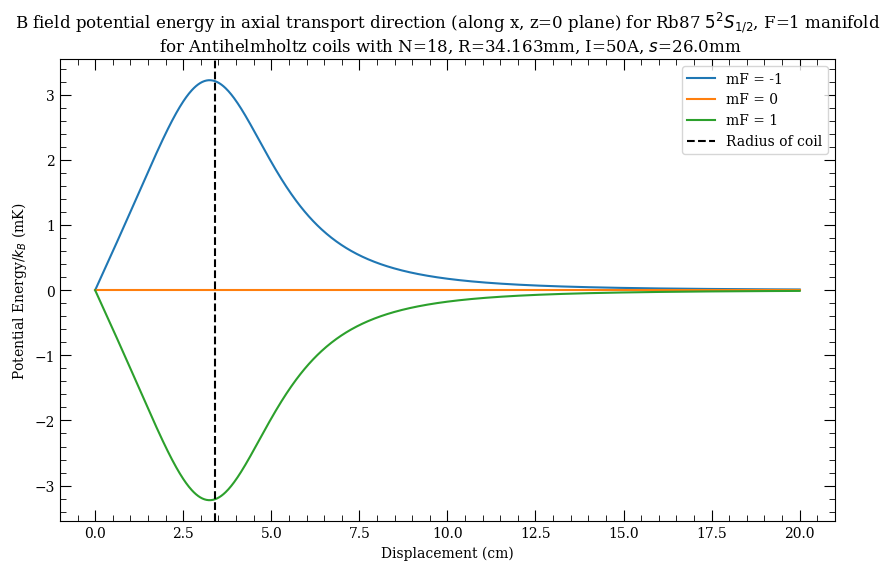

In [7]:
##### Axial (along x) displacement, (z=0) #####
# MOT coil parameters, copying 2.0's numbers
N = 18 # 18 turns total
R = 68.326e-3/2 # Inner radius
current = 50 # 50 A
s = 26e-3 # 53 mm between coils along coil axis

# Atom choice
atom = arc.Rubidium87()   # pick an atom
n = 5
L = 0
J = 1/2
S = 1/2  # For alkali atoms
I  = atom.I # nuclear spin
F = 1 # Choose F=1 manifold

# Calculated constants
gI = atom.gI             # nuclear g-factor (dimensionless, for use with μ_N)
gJ = lande_gJ(L, S, J, gL=atom.gL, gS=atom.gS)
gF = lande_gF(F, J, I, gJ, gI)

x_displacements = np.linspace(0,20,1000)*1e-2
z = 0

mF_vals = np.arange(-F, F+1, 1)

T_biglist = []
for mF_temp in mF_vals:
    T_list = []
    Bmag_list = []
    for x_temp in x_displacements:
        Bmag = B_antihelmholtz(x_temp, z, R, s, N, current)
        Bmag_list.append(Bmag)
        _, T_temp = U_from_mag(gF,mF_temp,Bmag)
        T_list.append(T_temp)
    T_biglist.append(T_list)
T_biglist = np.array(T_biglist)

plt.figure(figsize=(10,6))
for mF_index in range(len(mF_vals)):
    plt.plot(x_displacements/1e-2, T_biglist[mF_index, :]/(1e-3), label=f"mF = {mF_vals[mF_index]}")
plt.axvline(R/1e-2, color='black', linestyle='--', label='Radius of coil')
plt.legend()
plt.xlabel("Displacement (cm)")
plt.ylabel("Potential Energy/$k_B$ (mK)")
plt.title(f"B field potential energy in axial transport direction (along x, z=0 plane) for {atom.elementName} ${n}{spectroscopic_term(L=L, S=S, J=J)}$, F={F} manifold \n for Antihelmholtz coils with N={N}, R={R/1e-3}mm, I={current}A, $s$={s/1e-3}mm")

Text(0.5, 1.0, 'B field potential energy in axial transport direction (along x, z=0 plane) for Rb87 $5^2S_{1/2}$, F=1 $m_F$=1 \n for Antihelmholtz coils with N=18, R=34.163mm, I=50A, $s$=26.0mm')

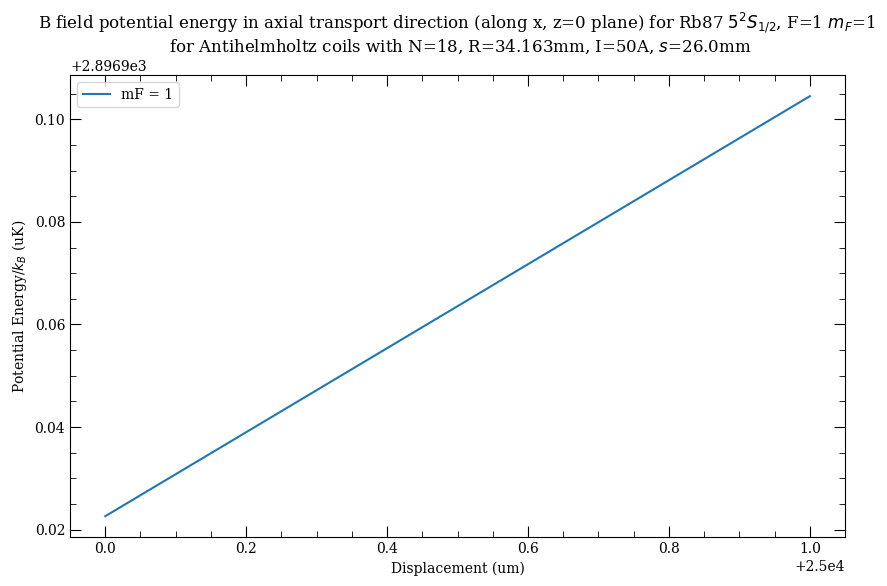

In [8]:
x_displacements = np.linspace(2.5e-2,((2.5e-2)+(1e-6)),1000)
z = 0

mF_vals = np.arange(-F, F+1, 1)

T_biglist = []
for mF_temp in mF_vals:
    T_list = []
    Bmag_list = []
    for x_temp in x_displacements:
        Bmag = B_antihelmholtz(x_temp, z, R, s, N, current)
        Bmag_list.append(Bmag)
        _, T_temp = U_from_mag(gF,mF_temp,Bmag)
        T_list.append(T_temp)
    T_biglist.append(T_list)
T_biglist = np.array(T_biglist)

plt.figure(figsize=(10,6))
plt.plot(x_displacements/1e-6, T_biglist[0, :]/(1e-6), label=f"mF = {mF_vals[mF_index]}")
plt.legend()
plt.xlabel("Displacement (um)")
plt.ylabel("Potential Energy/$k_B$ (uK)")
plt.title(f"B field potential energy in axial transport direction (along x, z=0 plane) for {atom.elementName} ${n}{spectroscopic_term(L=L, S=S, J=J)}$, F={F} $m_F$=1 \n for Antihelmholtz coils with N={N}, R={R/1e-3}mm, I={current}A, $s$={s/1e-3}mm")

Text(0.5, 1.0, 'Trap depth change in vertical radial direction (x=y=0) for Rb87 $5^2P_{3/2}$, F=1 manifold \n for Antihelmholtz coils with N=18, R=34.163mm, I=50A, $z_0$=26.0mm')

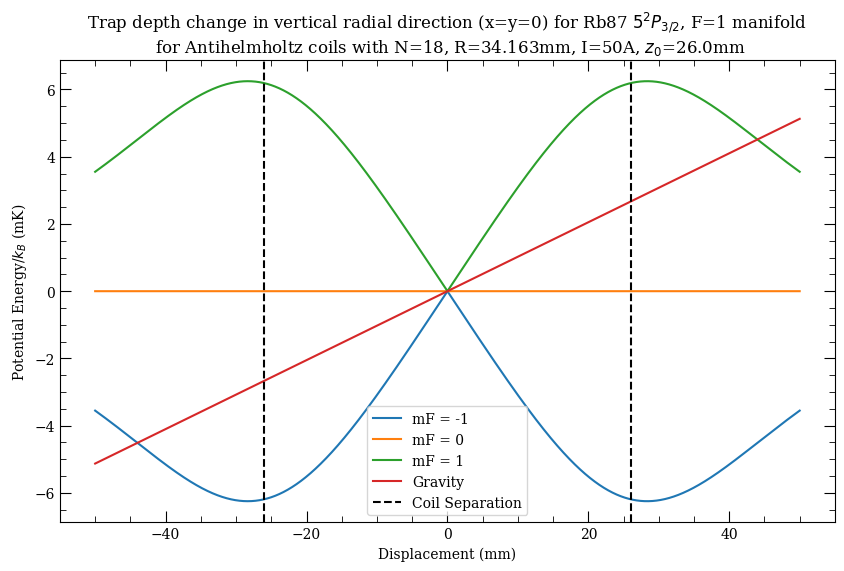

In [9]:
##### Axial (along x) displacement, (z=0) #####
# MOT coil parameters, copying 2.0's numbers
N = 18 # 18 turns total
R = 68.326e-3/2 # Inner radius
current = 50 # 50 A
s = 26e-3 # 53 mm between coils along coil axis

# Atom choice
atom = arc.Rubidium87()   # pick an atom
n = 5
L = 1
J = 3/2
S = 1/2  # For alkali atoms
I  = atom.I # nuclear spin
F = 1 # Choose F=1 manifold

# Calculated constants
gI = atom.gI             # nuclear g-factor (dimensionless, for use with μ_N)
gJ = lande_gJ(L, S, J, gL=atom.gL, gS=atom.gS)
gF = lande_gF(F, J, I, gJ, gI)

x = 0
z_displacements = np.linspace(-50,50,10000)*1e-3

mF_vals = np.arange(-F, F+1, 1)

T_biglist = []
for mF_temp in mF_vals:
    T_list = []
    for z_temp in z_displacements:
        Bmag = B_antihelmholtz(x, z_temp, R, s, N, current, mu0=mu0)
        _, T_temp = U_from_mag(gF,mF_temp,Bmag)
        T_list.append(T_temp)
    T_biglist.append(T_list)
T_biglist = np.array(T_biglist)


plt.figure(figsize=(10,6))
for mF_index in range(len(mF_vals)):
    plt.plot(z_displacements/1e-3, T_biglist[mF_index, :]/(1e-3), label=f"mF = {mF_vals[mF_index]}")
plt.plot(z_displacements/1e-3, (z_displacements*9.8*m)/(kB*1e-3), label=f"Gravity")
plt.axvline(-s/1e-3, color="black", linestyle='--', label='Coil Separation')
plt.axvline(s/1e-3, color='black', linestyle='--')
plt.legend()
plt.axhline
plt.xlabel("Displacement (mm)")
plt.ylabel("Potential Energy/$k_B$ (mK)")
plt.title(f"Trap depth change in vertical radial direction (x=y=0) for {atom.elementName} ${n}{spectroscopic_term(L=L, S=S, J=J)}$, F={F} manifold \n for Antihelmholtz coils with N={N}, R={R/1e-3}mm, I={current}A, $z_0$={s/1e-3}mm")